In [12]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
from sci378 import *

Version 0.0.2


In [4]:
from sie.mcmc import MCMCModel,Bernoulli,Uniform,Cauchy,Normal,Jeffreys,Beta
rcParams['figure.figsize']=(8,6)

In [5]:
def P_data(data,θ):
    D,U=data
    N=D+U
    return D*log(θ)+ (N-D)*log(1-θ)

In [7]:
D,U=data=3,9

In [13]:
model=MCMCModel(data,P_data,
               θ=Uniform(0,1))

Sampling Prior...
Done.
0.26 s
Running MCMC...
Done.
0.70 s
figsize [6.0, 3.75]


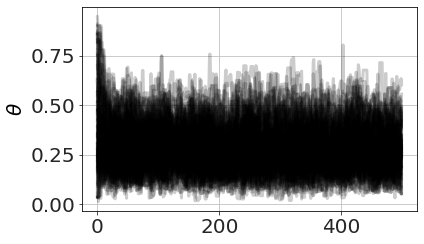

In [14]:
model.run_mcmc(500)
model.plot_chains()

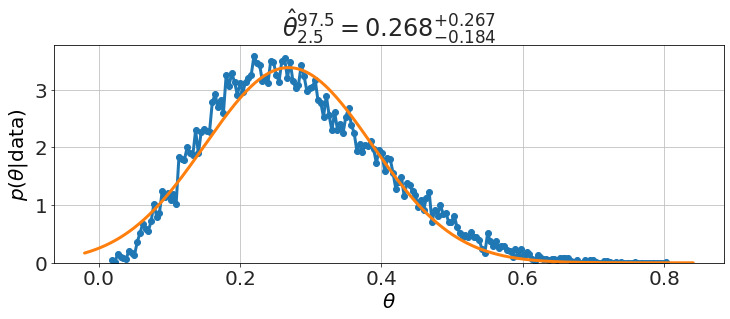

In [15]:
model.plot_distributions()

In [19]:
model.P("θ>0.9")

0.0

## Some other data

In [22]:
data=pd.read_excel('data/Pennies.xlsx')
data.head()

,Year,Number of Pennies,Mass (g),Height (cm),Diameter (cm)
0,1960,3,9.4,0.452,1.902
1,1961,6,18.5,0.874,1.902
2,1962,4,12.7,0.694,1.902
3,1963,5,15.6,0.860,1.902
4,1964,15,46.5,2.242,1.902


In [23]:
total_mass=array(data['Mass (g)'])
number_of_pennies=array(data['Number of Pennies'])
mass_per_penny=total_mass/number_of_pennies
year=array(data['Year'])

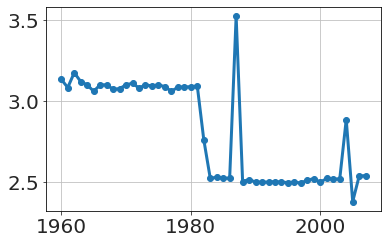

In [24]:
plot(year,mass_per_penny,'-o')

(-10, 10)

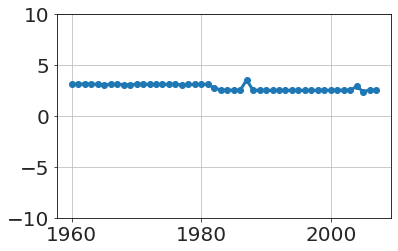

In [31]:
plot(year,mass_per_penny,'-o')
ylim([-10,10])

(1979, 1984)

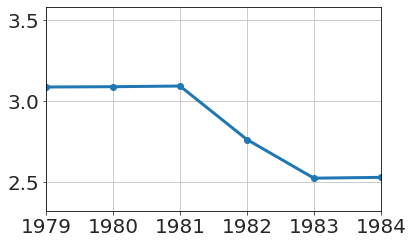

In [26]:
plot(year,mass_per_penny,'-o')
xlim([1979,1984])

In [27]:
m=mass_per_penny[year<1982]
y=year[year<1982]

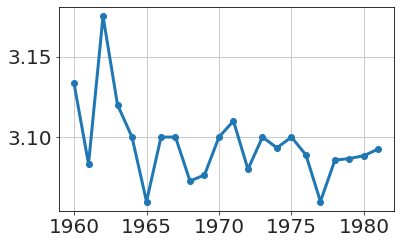

In [28]:
plot(y,m,'-o')

In [32]:
def P_data(data,μ):
    x=data
    σ=0.1
    distribution=Normal(μ,σ)
    return sum(distribution(x))

In [39]:
model=MCMCModel(m,P_data,
               μ=Normal(0,20))

Sampling Prior...
Done.
0.58 s
Running MCMC...
Done.
2.08 s
figsize [6.0, 3.75]


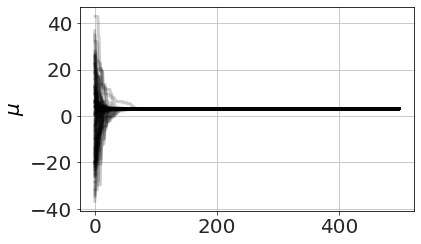

In [40]:
model.run_mcmc(500)
model.plot_chains()

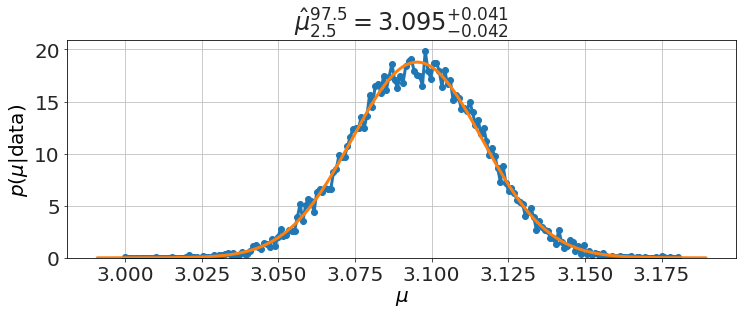

In [41]:
model.plot_distributions()

In [42]:
def P_data(data,μ,σ):
    x=data
    distribution=Normal(μ,σ)
    return sum(distribution(x))

In [43]:
model=MCMCModel(m,P_data,
               μ=Normal(0,20),
               σ=Uniform(0,10),
               )

Sampling Prior...
Done.
0.64 s
Running MCMC...
Done.
2.30 s
figsize [6.0, 7.5]


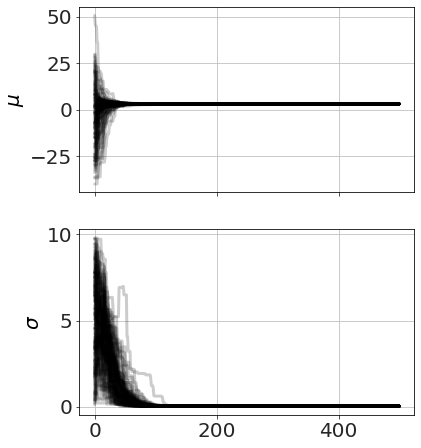

In [44]:
model.run_mcmc(500)
model.plot_chains()

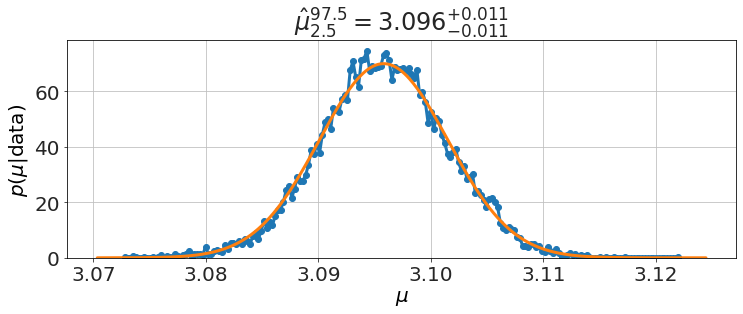

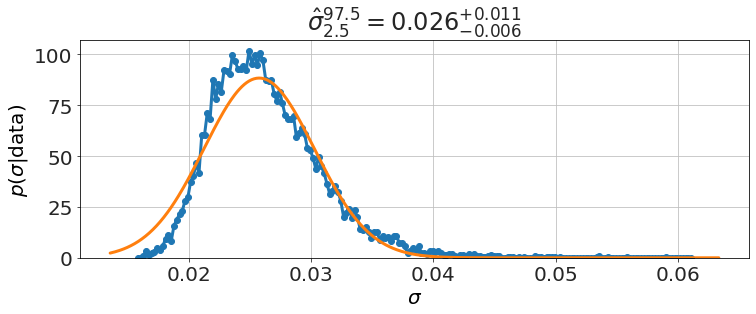

In [45]:
model.plot_distributions()

In [49]:
model=MCMCModel(m,P_data,
               μ=Normal(0,20),
               σ=Jeffreys(),
               )

Sampling Prior...
Done.
0.67 s
Running MCMC...
Done.
2.16 s
figsize [6.0, 7.5]


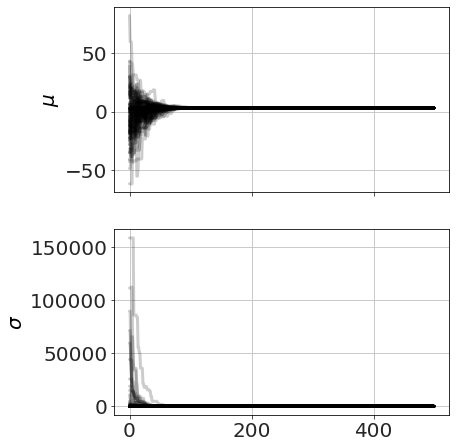

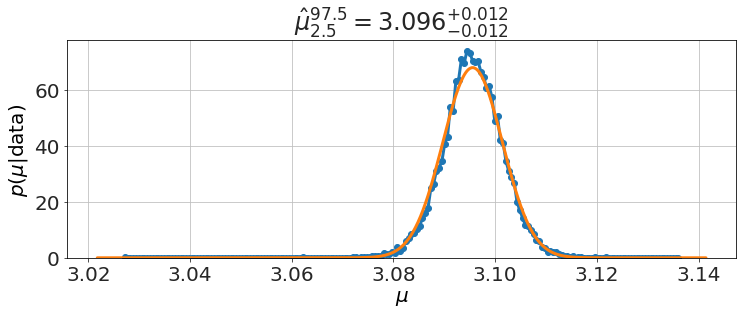

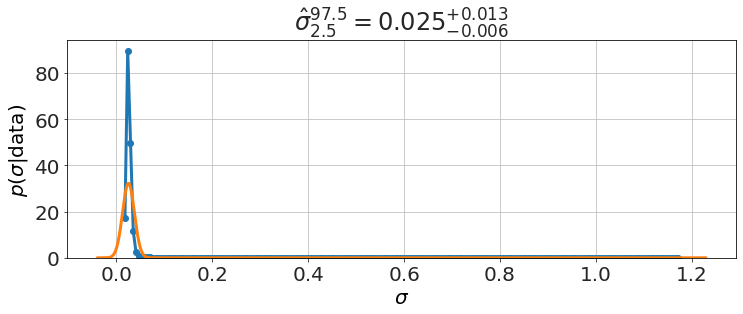

In [50]:
model.run_mcmc(500)
model.plot_chains()

model.plot_distributions()

Running MCMC...
Done.
2.35 s
figsize [6.0, 7.5]


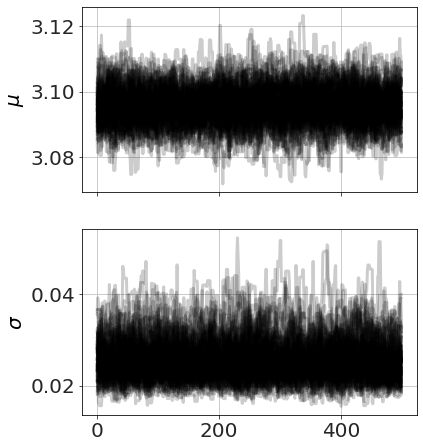

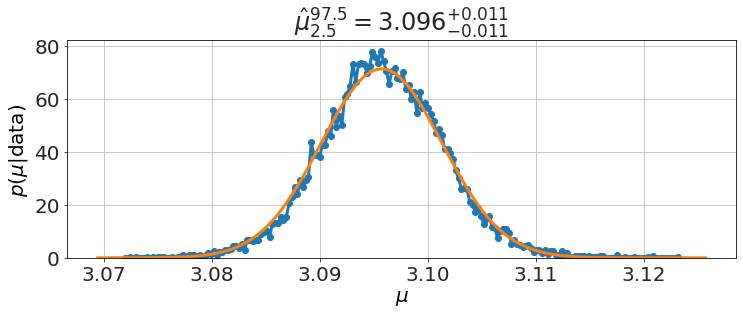

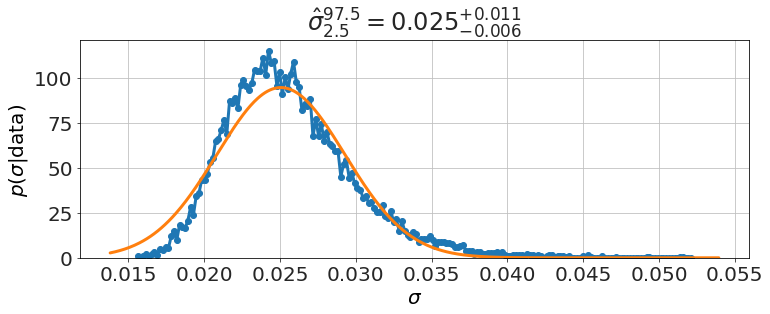

In [51]:
model.run_mcmc(500)
model.plot_chains()

model.plot_distributions()

Sampling Prior...
Done.
0.64 s
Running MCMC...
Done.
2.15 s
Running MCMC...
Done.
2.14 s
figsize [6.0, 7.5]


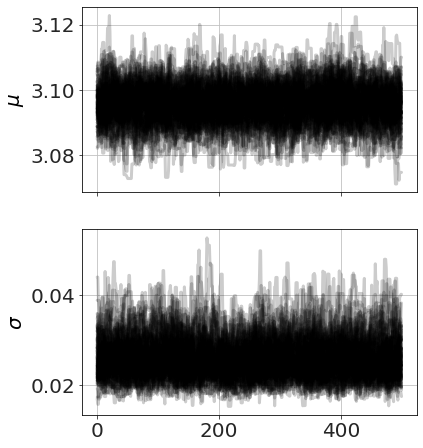

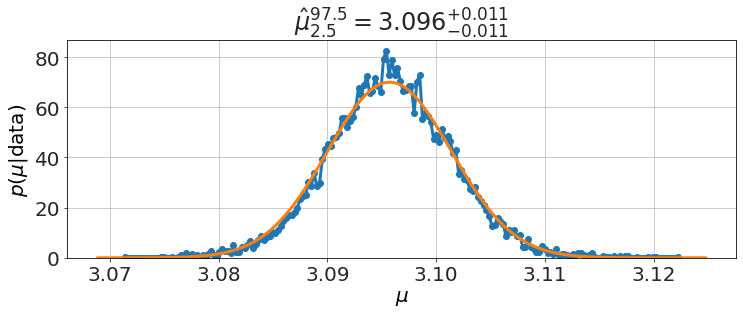

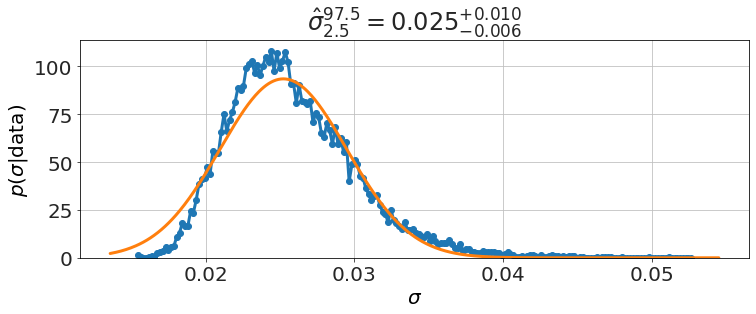

In [52]:
model=MCMCModel(m,P_data,
               μ=Normal(0,20),
               σ=Jeffreys(),
               )

for i in range(2):
    model.run_mcmc(500)
    
    
model.plot_chains()
model.plot_distributions()